<a href="https://colab.research.google.com/github/gyurmey/tensorflow/blob/main/night.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [63]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

len(x_train)

len(x_test)

x_train[0].shape

(28, 28)

In [64]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

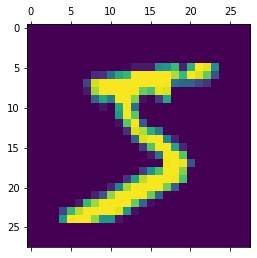

In [65]:
plt.matshow(x_train[0])

In [66]:
y_train[0]

5

In [67]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [68]:
x_train.shape

(60000, 28, 28)

In [69]:
x_train = x_train / 255
x_test = x_test / 255

In [70]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [71]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [72]:
x_train_flattened.shape

(60000, 784)

In [73]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)



Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4660 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3031 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2831 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2733 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9255


In [74]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2661 - accuracy: 0.9251


[0.26614630222320557, 0.9251000285148621]

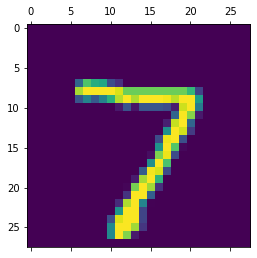

In [75]:
plt.matshow(x_test[0])

In [76]:
# Make the predictions
y_predicted = model.predict(x_test_flattened)
y_predicted[0]


313/313 [==============================] - 1s 2ms/step


array([1.51501745e-02, 2.71734365e-07, 4.48111705e-02, 9.49636996e-01,
       2.15283409e-03, 1.14909977e-01, 1.88569447e-06, 9.99781072e-01,
       1.00874938e-01, 6.84285104e-01], dtype=float32)

In [77]:
np.argmax(y_predicted[0])

7

In [78]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [79]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    4,    6,    2,    2,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   7,   12,  908,   21,    8,    4,   13,   10,   45,    4],
       [   3,    0,   16,  918,    1,   27,    2,   12,   23,    8],
       [   1,    1,    3,    2,  917,    0,   11,    4,   10,   33],
       [   9,    2,    1,   28,   11,  784,   11,    8,   32,    6],
       [  11,    3,    3,    2,    7,   18,  908,    2,    4,    0],
       [   1,    5,   20,    8,    9,    0,    0,  948,    3,   34],
       [   6,    8,    5,   19,    9,   28,    8,   11,  872,    8],
       [  11,    7,    1,   10,   28,    7,    0,   20,    5,  920]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

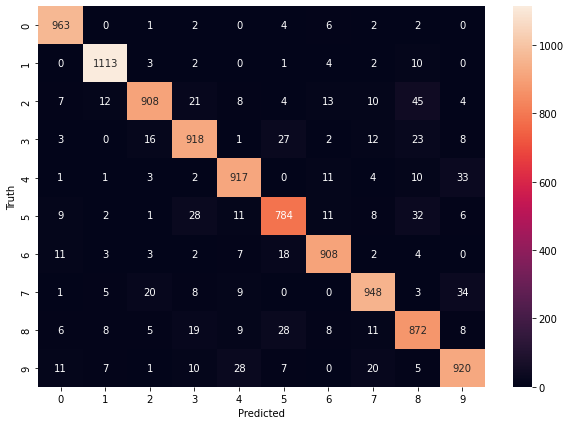

In [80]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [81]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2734 - accuracy: 0.9226
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1285 - accuracy: 0.9617
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0902 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0686 - accuracy: 0.9788
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0540 - accuracy: 0.9831


In [82]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0890 - accuracy: 0.9710


[0.08903592079877853, 0.9710000157356262]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

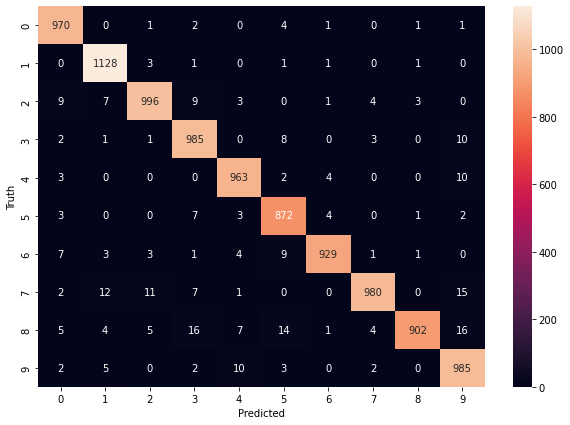

In [83]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [84]:
# Flattening data using keras Flatten class
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [85]:
# model.fit(x_train_flattened, y_train, epochs=5)

In [108]:

def f1_score(y_true, y_pred):
    """Computes the F1 score"""
    true_positives = tf.math.count_nonzero(y_pred * y_true, dtype=tf.float32)
    false_positives = tf.math.count_nonzero(y_pred * (y_true - 1), dtype=tf.float32)
    false_negatives = tf.math.count_nonzero((y_pred - 1) * y_true, dtype=tf.float32)
    
    precision = true_positives / (true_positives + false_positives + 1e-8)
    recall = true_positives / (true_positives + false_negatives + 1e-8)
    f1 = 2 * precision * recall / (precision + recall + 1e-8)
    
    return f1, precision, recall


In [109]:
# from sklearn.metrics import f1_score

In [110]:
print(y_predicted[0])

[8.7675624e-02 2.0343815e-03 4.1273245e-01 9.9157882e-01 1.1208098e-05
 2.5922826e-02 1.1172848e-06 9.9999285e-01 1.7130746e-01 7.4462718e-01]


In [113]:
y_true = tf.constant([1, 0, 1, 0])
y_pred = tf.constant([1, 1, 0, 1])

f1, precision, recall = f1_score(y_true, y_pred)

print("F1 score:", f1.numpy())
print("Precision:", precision.numpy())
print("Recall:", recall.numpy())


F1 score: 0.4
Precision: 0.33333334
Recall: 0.5
